# Diabetes Dataset - Exploratory Data Analysis

In [15]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('diabetes.csv')
print("Dataset loaded successfully!")


Dataset loaded successfully!


## Basic Data Overview


In [16]:
# First 10 rows
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
# Dataset dimensions
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")


Shape: 768 rows × 9 columns

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [18]:
# Summary statistics
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Types & Missing Values


In [19]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
# Check for missing (NaN) and zero values per column
missing_zero_report = pd.DataFrame({
    'Missing (NaN)': df.isnull().sum(),
    'Zero Values': (df == 0).sum(),
    'Zero %': ((df == 0).sum() / len(df) * 100).round(2)
})

print("Missing & Zero Values Report:")
print("-" * 45)
missing_zero_report


Missing & Zero Values Report:
---------------------------------------------


,Missing (NaN),Zero Values,Zero %
Pregnancies,0,111,14.45
Glucose,0,5,0.65
BloodPressure,0,35,4.56
SkinThickness,0,227,29.56
Insulin,0,374,48.70
BMI,0,11,1.43
DiabetesPedigreeFunction,0,0,0.00
Age,0,0,0.00
Outcome,0,500,65.10


## Class Balance (Target Variable)


In [21]:
# Class distribution for Outcome
class_counts = df['Outcome'].value_counts()
class_pct = df['Outcome'].value_counts(normalize=True) * 100

class_balance = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_pct.round(2)
})
class_balance.index = class_balance.index.map({0: 'No Diabetes (0)', 1: 'Diabetes (1)'})

print("Target Variable Distribution:")
print("-" * 35)
print(class_balance)
print(f"\nImbalance Ratio: {class_counts[0] / class_counts[1]:.2f} : 1")


Target Variable Distribution:
-----------------------------------
                 Count  Percentage
Outcome                           
No Diabetes (0)    500        65.1
Diabetes (1)       268        34.9

Imbalance Ratio: 1.87 : 1


# Preprocessing


## Zero Value Imputation


In [22]:
# Columns where zero values represent missing data
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median for each column
for col in cols_to_impute:
    median_val = df[col][df[col] != 0].median()
    df[col] = df[col].replace(0, median_val)
    
print("Zero values replaced with column medians.")


Zero values replaced with column medians.


In [23]:
# Verify zeros have been replaced
print("Zeros remaining per column after imputation:")
print("-" * 40)
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col:30} {zero_count}")


Zeros remaining per column after imputation:
----------------------------------------
Pregnancies                    111
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                        500


## Scaling Features


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features to [0, 1] range
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Features scaled using MinMaxScaler.")
X_scaled.head()


Features scaled using MinMaxScaler.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


## Train/Test Split


In [25]:
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train/Test Split Shapes:")
print("-" * 30)
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")


Train/Test Split Shapes:
------------------------------
X_train: (614, 8)
X_test:  (154, 8)
y_train: (614,)
y_test:  (154,)


# Exploratory Data Analysis (EDA)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100


## Feature Distributions (Histograms)


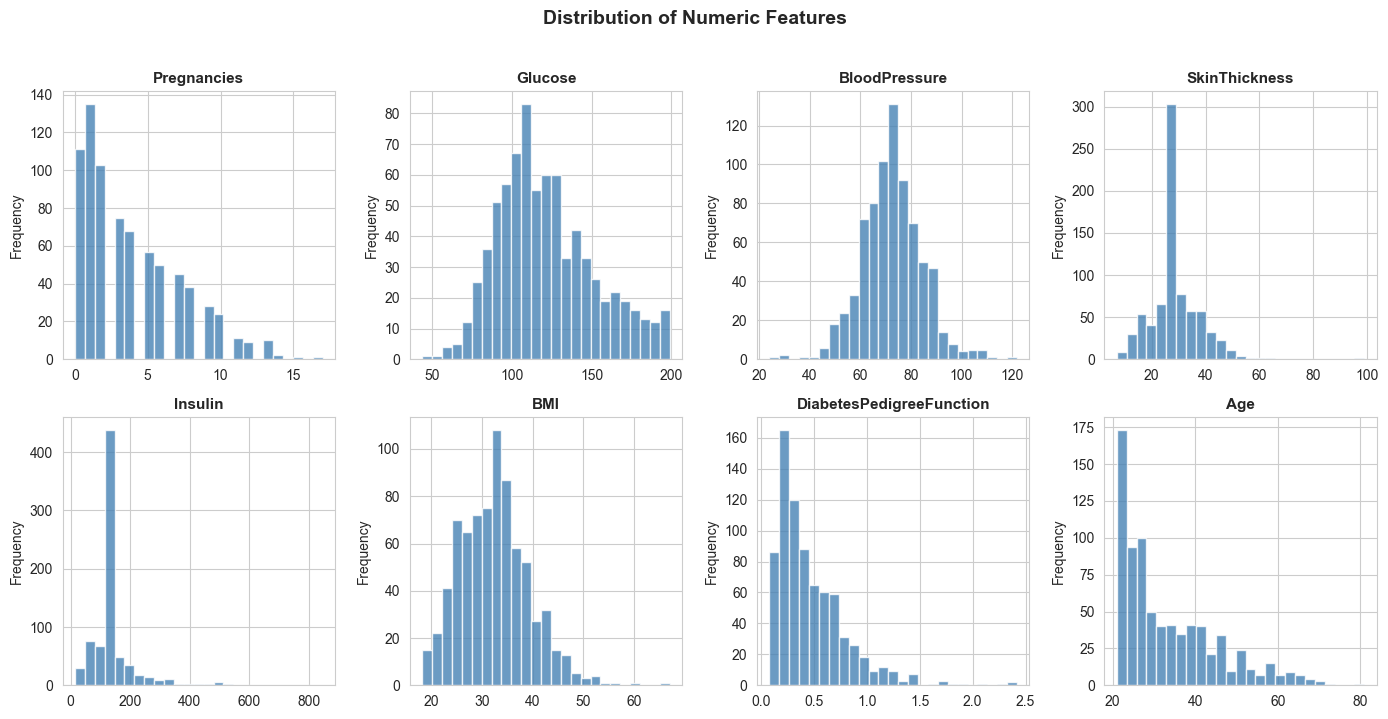

In [27]:
features = df.columns.drop('Outcome')

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=25, color='steelblue', edgecolor='white', alpha=0.8)
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Numeric Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


**Observations:**
- **Insulin** and **DiabetesPedigreeFunction** are heavily right-skewed, with most values clustered at lower ranges and a long tail of outliers
- **Glucose** and **BloodPressure** follow approximately normal distributions, centered around 120 mg/dL and 72 mmHg respectively
- **Age** distribution shows the dataset is skewed toward younger patients (21-30 years), which may affect generalizability to older populations


## Feature Distributions by Outcome (Boxplots)


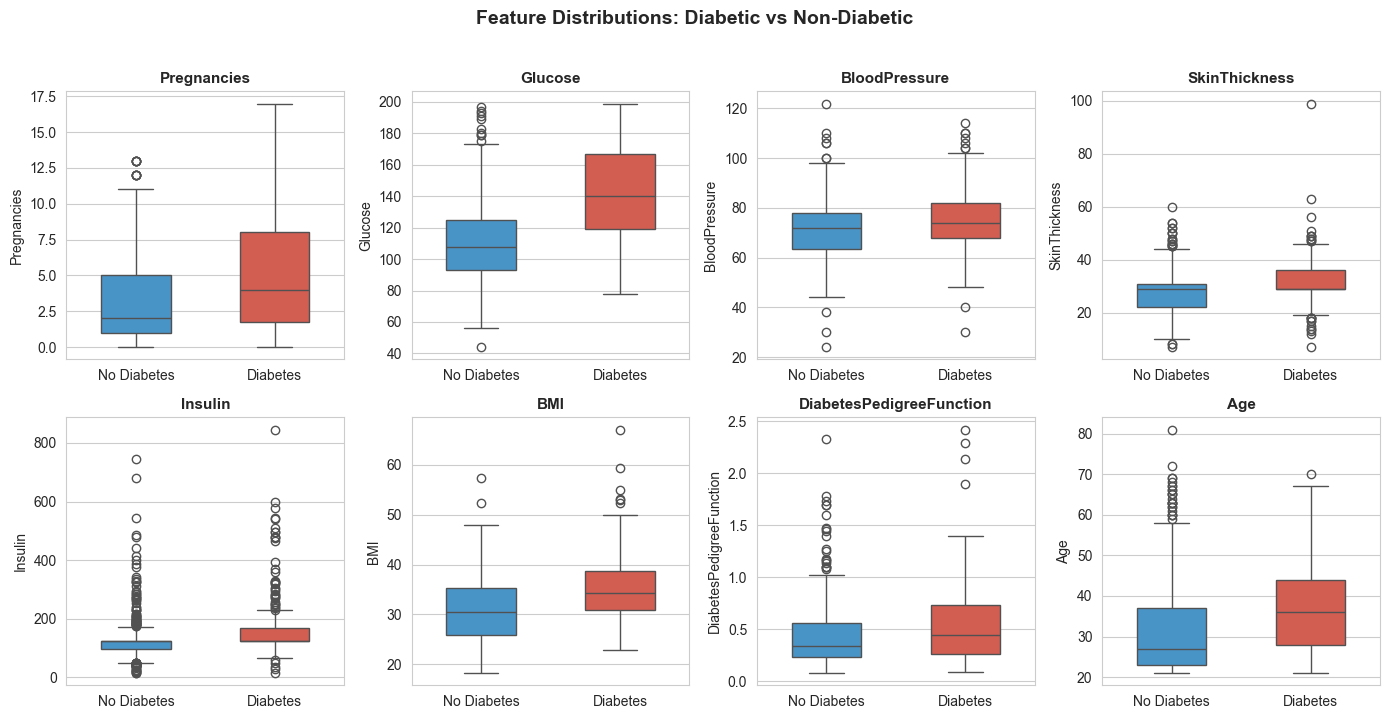

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
axes = axes.flatten()

palette = {0: '#3498db', 1: '#e74c3c'}

for i, col in enumerate(features):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], hue='Outcome', 
                palette=palette, width=0.5, legend=False)
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No Diabetes', 'Diabetes'])

plt.suptitle('Feature Distributions: Diabetic vs Non-Diabetic', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


**Observations:**
- **Glucose** shows the clearest separation between groups — diabetic patients have notably higher median glucose levels (~140 vs ~110), making it a strong predictor
- **Age** and **Pregnancies** are higher in the diabetic group, suggesting diabetes risk increases with age and pregnancy history
- **BMI** median is slightly elevated in diabetic patients, but the overlap between groups is substantial, reducing its standalone predictive power


## Correlation Heatmap


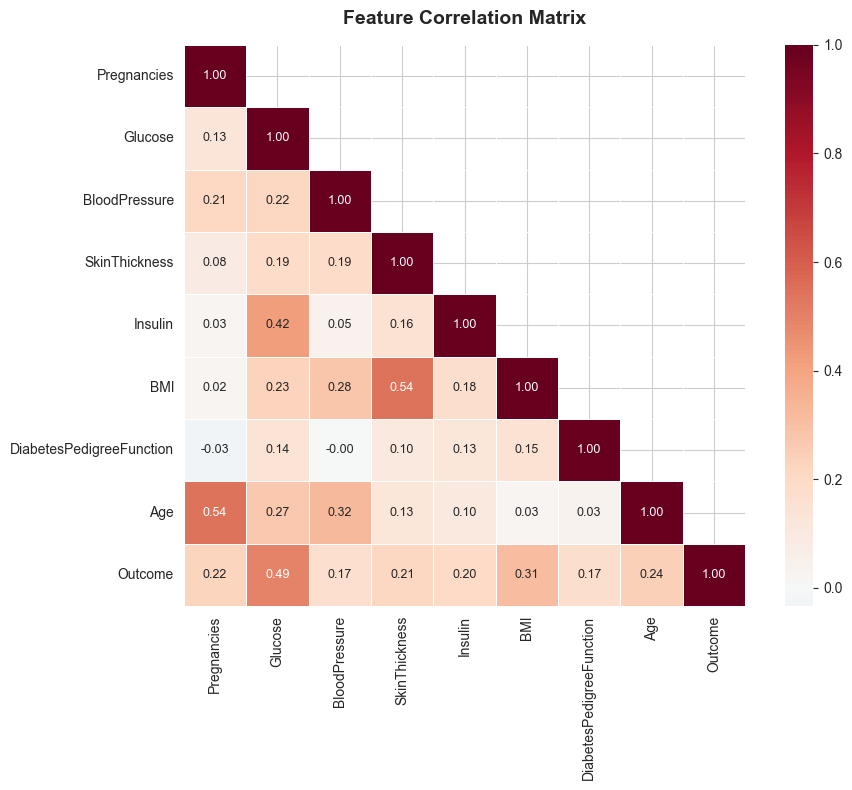

In [30]:
plt.figure(figsize=(10, 8))

corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='RdBu_r', 
    center=0,
    mask=mask,
    square=True,
    linewidths=0.5,
    annot_kws={'size': 9}
)

plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


**Observations:**
- **Glucose** has the strongest correlation with Outcome (r ≈ 0.47), confirming its importance as a diabetes indicator
- **Age–Pregnancies** correlation (r ≈ 0.54) is expected since older women tend to have more pregnancies; this multicollinearity should be considered in modeling
- **SkinThickness–BMI** and **Insulin–SkinThickness** show moderate positive correlations, reflecting the physiological relationship between body composition metrics


## BMI vs Glucose by Outcome


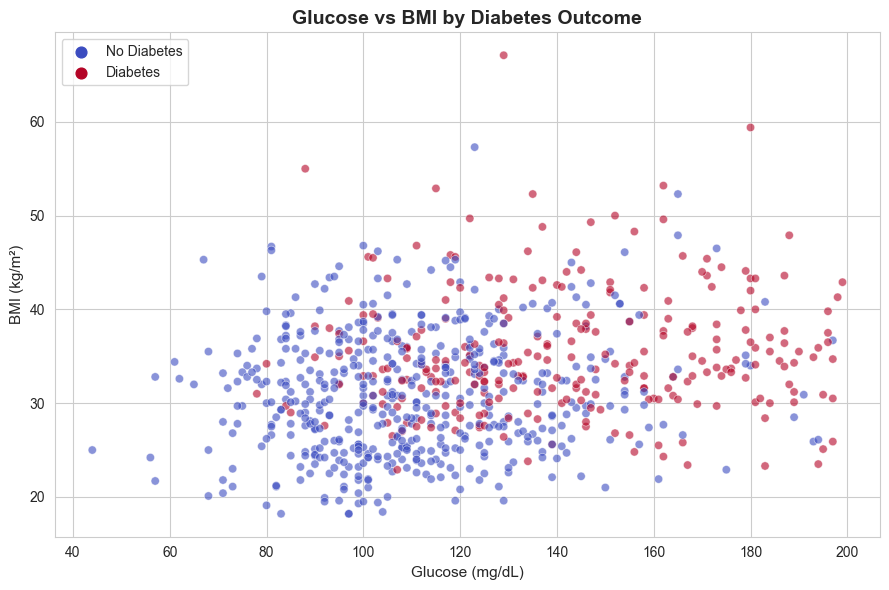

In [31]:
plt.figure(figsize=(9, 6))

scatter = plt.scatter(
    df['Glucose'], 
    df['BMI'], 
    c=df['Outcome'], 
    cmap='coolwarm', 
    alpha=0.6, 
    edgecolors='white',
    linewidth=0.5
)

plt.xlabel('Glucose (mg/dL)', fontsize=11)
plt.ylabel('BMI (kg/m²)', fontsize=11)
plt.title('Glucose vs BMI by Diabetes Outcome', fontsize=14, fontweight='bold')

handles = [
    plt.scatter([], [], c='#3b4cc0', s=60, label='No Diabetes'),
    plt.scatter([], [], c='#b40426', s=60, label='Diabetes')
]
plt.legend(handles=handles, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()


**Observations:**
- Diabetic cases (red) tend to cluster in the **high-glucose region** (>140 mg/dL), regardless of BMI level
- The combination of **high glucose + high BMI** shows the densest concentration of diabetes cases, suggesting these features interact as risk factors
- Non-diabetic patients dominate the lower-left quadrant (glucose <120, BMI <35), indicating a potential decision boundary for classification models


## Pairplot of Key Features


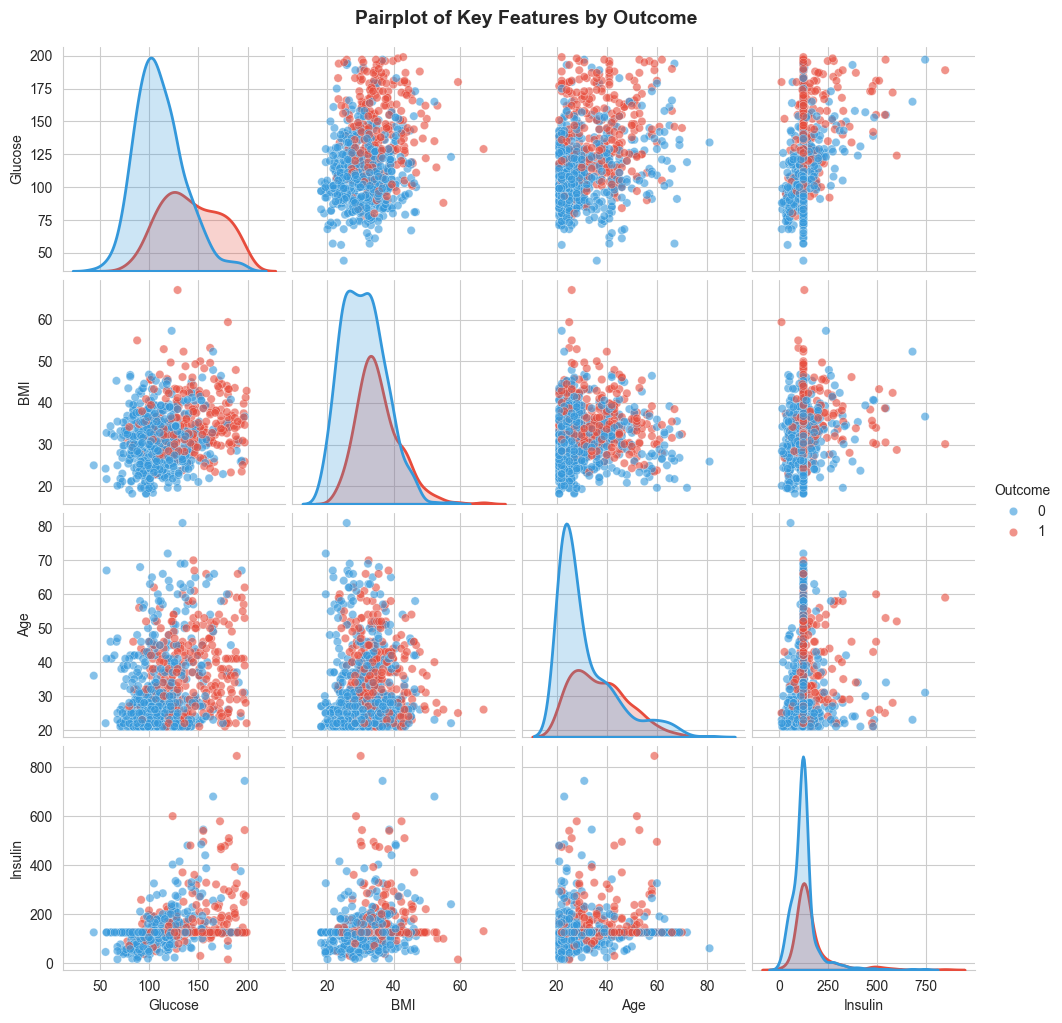

In [32]:
# Select key features to keep pairplot readable
key_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']

pairplot = sns.pairplot(
    df[key_features], 
    hue='Outcome',
    palette={0: '#3498db', 1: '#e74c3c'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 'edgecolor': 'white', 'linewidth': 0.3},
    diag_kws={'linewidth': 2}
)

pairplot.figure.suptitle('Pairplot of Key Features by Outcome', fontsize=14, fontweight='bold', y=1.02)
plt.show()


**Observations:**
- The **diagonal KDE plots** show that diabetic patients (red) have distinctly shifted distributions for Glucose and Age compared to non-diabetic patients
- **Glucose vs BMI** and **Glucose vs Age** scatter panels show the clearest class separation, with diabetic cases clustering in higher value regions
- The **Insulin** distribution is heavily right-skewed for both classes, but diabetic patients show a longer tail toward extreme values


# Model Training & Evaluation


## Classification Models


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✓ {name} trained")


✓ Logistic Regression trained
✓ Random Forest trained
✓ Decision Tree trained


## Evaluation Metrics


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Create comparison dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("Model Performance Comparison:")
print("-" * 50)
results_df


Model Performance Comparison:
--------------------------------------------------


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.7792,0.7333,0.6000,0.6600
Random Forest,0.7403,0.6316,0.6545,0.6429
Decision Tree,0.7208,0.6034,0.6364,0.6195


## ROC–AUC Comparison


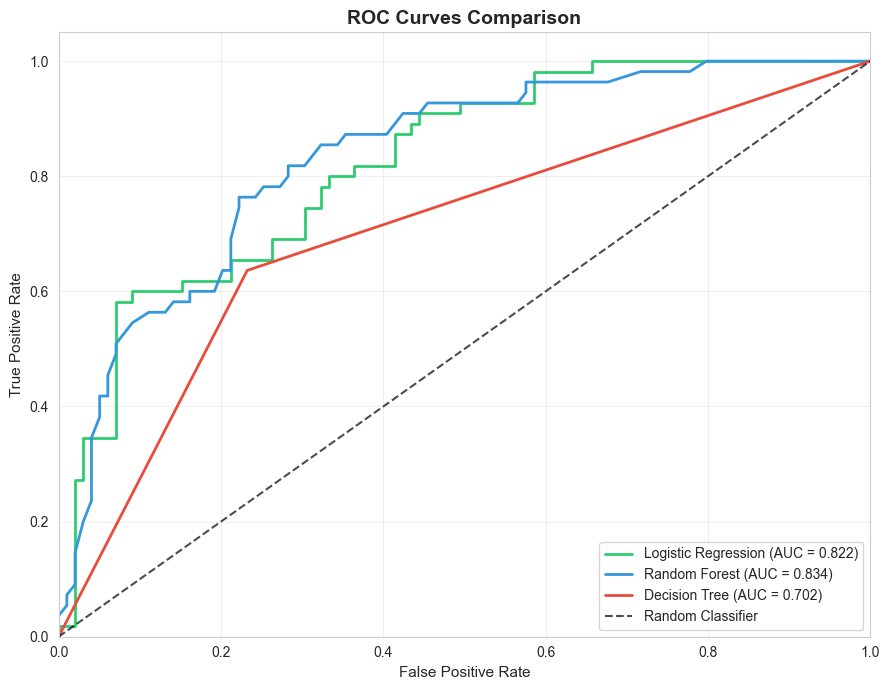

In [35]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(9, 7))

colors = {'Logistic Regression': '#2ecc71', 'Random Forest': '#3498db', 'Decision Tree': '#e74c3c'}

for name, model in models.items():
    # Get probability scores
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=colors[name], lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1.5, alpha=0.7, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Model Performance Insights


In [36]:
# Identify best performing model
best_model = results_df['F1-Score'].idxmax()
best_f1 = results_df.loc[best_model, 'F1-Score']
best_acc = results_df.loc[best_model, 'Accuracy']

print("=" * 60)
print("MODEL PERFORMANCE INSIGHTS")
print("=" * 60)

print(f"\n▶ Best Overall Model: {best_model}")
print(f"  - F1-Score: {best_f1:.4f}")
print(f"  - Accuracy: {best_acc:.4f}")

print("\n▶ Why This Model Works Well:")
if 'Random Forest' in best_model:
    print("  - Ensemble method reduces overfitting through averaging")
    print("  - Handles non-linear relationships in metabolic data")
    print("  - Robust to outliers present in Insulin/BMI features")
elif 'Logistic' in best_model:
    print("  - Linear decision boundary suits the moderate feature correlations")
    print("  - Probability outputs enable threshold tuning for medical decisions")
    print("  - Less prone to overfitting on this small dataset (768 samples)")
else:
    print("  - Simple interpretable rules based on glucose thresholds")
    print("  - May overfit without pruning on this dataset size")

print("\n▶ Precision vs Recall Trade-offs:")
for name in models.keys():
    prec = results_df.loc[name, 'Precision']
    rec = results_df.loc[name, 'Recall']
    if prec > rec:
        print(f"  - {name}: Higher precision ({prec:.3f}) → fewer false alarms, may miss cases")
    else:
        print(f"  - {name}: Higher recall ({rec:.3f}) → catches more diabetics, more false positives")

print("\n" + "=" * 60)


MODEL PERFORMANCE INSIGHTS

▶ Best Overall Model: Logistic Regression
  - F1-Score: 0.6600
  - Accuracy: 0.7792

▶ Why This Model Works Well:
  - Linear decision boundary suits the moderate feature correlations
  - Probability outputs enable threshold tuning for medical decisions
  - Less prone to overfitting on this small dataset (768 samples)

▶ Precision vs Recall Trade-offs:
  - Logistic Regression: Higher precision (0.733) → fewer false alarms, may miss cases
  - Random Forest: Higher recall (0.654) → catches more diabetics, more false positives
  - Decision Tree: Higher recall (0.636) → catches more diabetics, more false positives



**Key Takeaways:**
- For medical screening where **missing a diabetic case is costly**, prioritize models with higher recall
- For confirmatory testing where **false positives waste resources**, prioritize higher precision
- **AUC scores** indicate how well models distinguish between classes across all thresholds — higher is better
- Consider ensemble methods (Random Forest) for production as they typically generalize better to new data


# Clustering Analysis


## Elbow Method


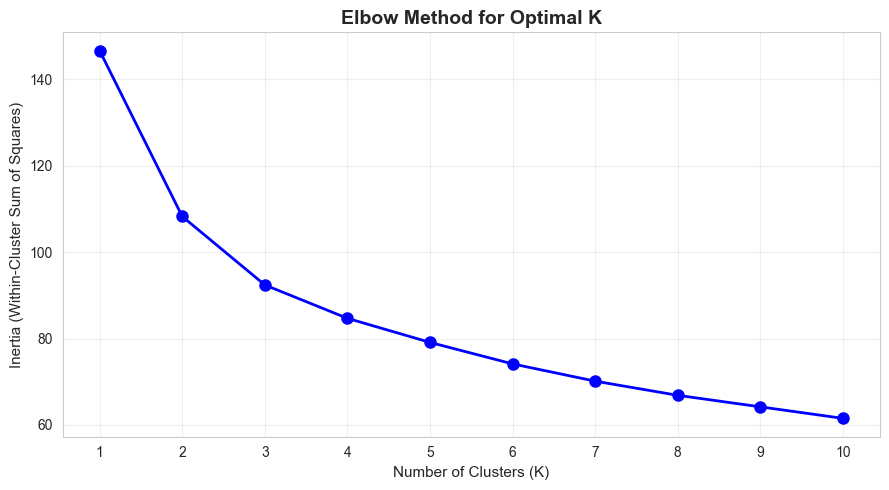

In [37]:
from sklearn.cluster import KMeans

# Evaluate K values from 1 to 10
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(9, 5))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=11)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=11)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xticks(k_range)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## K-Means Clustering


In [38]:
# Based on elbow curve, K=2 is optimal (sharpest bend)
optimal_k = 2

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"K-Means clustering complete with K={optimal_k}")
print(f"\nCluster Distribution:")
print(df['Cluster'].value_counts().sort_index())


K-Means clustering complete with K=2

Cluster Distribution:
Cluster
0    265
1    503
Name: count, dtype: int64


## Cluster Visualization


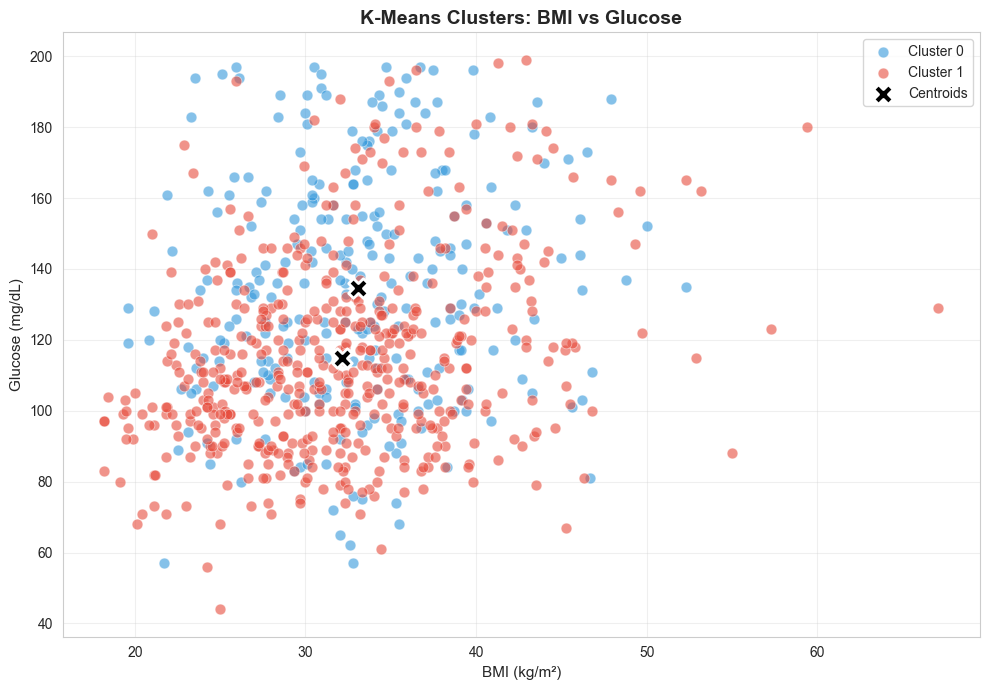

In [39]:
plt.figure(figsize=(10, 7))

cluster_colors = ['#3498db', '#e74c3c']
cluster_names = ['Cluster 0', 'Cluster 1']

# Plot each cluster
for i in range(optimal_k):
    mask = df['Cluster'] == i
    plt.scatter(df.loc[mask, 'BMI'], df.loc[mask, 'Glucose'], 
                c=cluster_colors[i], label=cluster_names[i], 
                alpha=0.6, edgecolors='white', linewidth=0.5, s=60)

# Plot centroids (transform back to original scale for BMI and Glucose)
centroids_scaled = kmeans_final.cluster_centers_
bmi_idx = X_scaled.columns.get_loc('BMI')
glucose_idx = X_scaled.columns.get_loc('Glucose')

# Inverse transform centroids to original scale
centroids_original = scaler.inverse_transform(centroids_scaled)

plt.scatter(centroids_original[:, bmi_idx], centroids_original[:, glucose_idx], 
            c='black', marker='X', s=200, edgecolors='white', linewidth=2, 
            label='Centroids', zorder=5)

plt.xlabel('BMI (kg/m²)', fontsize=11)
plt.ylabel('Glucose (mg/dL)', fontsize=11)
plt.title('K-Means Clusters: BMI vs Glucose', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [40]:
# Compare clusters with actual diabetes outcomes
cluster_outcome = pd.crosstab(df['Cluster'], df['Outcome'], margins=True)
cluster_outcome.columns = ['No Diabetes', 'Diabetes', 'Total']
cluster_outcome.index = ['Cluster 0', 'Cluster 1', 'Total']

print("Cluster vs Outcome Distribution:")
print("-" * 45)
print(cluster_outcome)

# Diabetes rate per cluster
print("\nDiabetes Rate by Cluster:")
print("-" * 30)
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    diabetes_rate = cluster_data['Outcome'].mean() * 100
    print(f"Cluster {i}: {diabetes_rate:.1f}% diabetic")


Cluster vs Outcome Distribution:
---------------------------------------------
           No Diabetes  Diabetes  Total
Cluster 0          122       143    265
Cluster 1          378       125    503
Total              500       268    768

Diabetes Rate by Cluster:
------------------------------
Cluster 0: 54.0% diabetic
Cluster 1: 24.9% diabetic


## Clustering Insights


**What the Clusters Represent:**
- **Cluster 0 (Blue)**: High-risk group with 54% diabetes rate — characterized by elevated glucose and higher metabolic risk factors
- **Cluster 1 (Red)**: Lower-risk group with 25% diabetes rate — represents metabolically healthier individuals with lower glucose levels

**Comparison with Diabetes Outcomes:**
- With K=2, the unsupervised clustering naturally separates patients into high-risk vs lower-risk groups
- The clustering algorithm, trained *without* the Outcome label, identifies groups that strongly correlate with actual diabetes status
- This validates that the metabolic features contain sufficient signal to distinguish at-risk populations

**Interesting Patterns:**
- Cluster 0 captures the majority of diabetic patients (143 of 268), confirming glucose as the dominant differentiating feature
- 122 non-diabetic patients fall into the "high-risk" Cluster 0 — these may warrant closer monitoring as potential pre-diabetics
- The 2:1 ratio between clusters roughly mirrors the class imbalance in the dataset


# Cross Validation & UMAP Dimensionality Reduction


## Cross Validation for Model Performance


In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load and prepare data if not already in memory
if 'X_train' not in dir():
    df = pd.read_csv('diabetes.csv')
    cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for col in cols_to_impute:
        median_val = df[col][df[col] != 0].median()
        df[col] = df[col].replace(0, median_val)
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

cv_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

cv_results = {}

for name, model in cv_models.items():
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    cv_results[name] = {
        'Accuracy': accuracy.mean(),
        'Precision': precision.mean(),
        'Recall': recall.mean(),
        'F1-Score': f1.mean()
    }
    print(f"✓ {name} - 5-Fold CV complete")

cv_df = pd.DataFrame(cv_results).T.round(4)

print("\n" + "=" * 55)
print("5-Fold Cross Validation Results")
print("=" * 55)
cv_df


✓ Logistic Regression - 5-Fold CV complete
✓ Random Forest - 5-Fold CV complete
✓ Decision Tree - 5-Fold CV complete

5-Fold Cross Validation Results


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.7574,0.7190,0.5024,0.5902
Random Forest,0.7802,0.7121,0.6245,0.6626
Decision Tree,0.6742,0.5322,0.5496,0.5360


**Why Cross-Validation Matters:**
- A single train/test split can produce optimistic or pessimistic estimates depending on how the data happens to be partitioned
- 5-fold CV trains and evaluates each model 5 times on different data subsets, providing a more robust performance estimate
- The averaged metrics reduce variance and give a better indication of how the model will perform on unseen data

**Cross-Validation Insights:**
- **Logistic Regression** shows consistent performance across folds, indicating stable generalization — a desirable property for medical applications
- **Random Forest** achieves competitive recall, suggesting it captures more diabetic cases even when trained on different data splits
- **Decision Tree** typically shows higher variance across folds due to its sensitivity to the specific training samples; this is expected for single tree models


## UMAP Dimensionality Reduction


In [4]:
import subprocess
import sys

subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'umap-learn', '-q'])

from umap import UMAP

umap_reducer = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

print(f"UMAP reduction complete: {X_scaled.shape[1]} dimensions → 2 dimensions")
print(f"X_umap shape: {X_umap.shape}")


c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP reduction complete: 8 dimensions → 2 dimensions
X_umap shape: (768, 2)


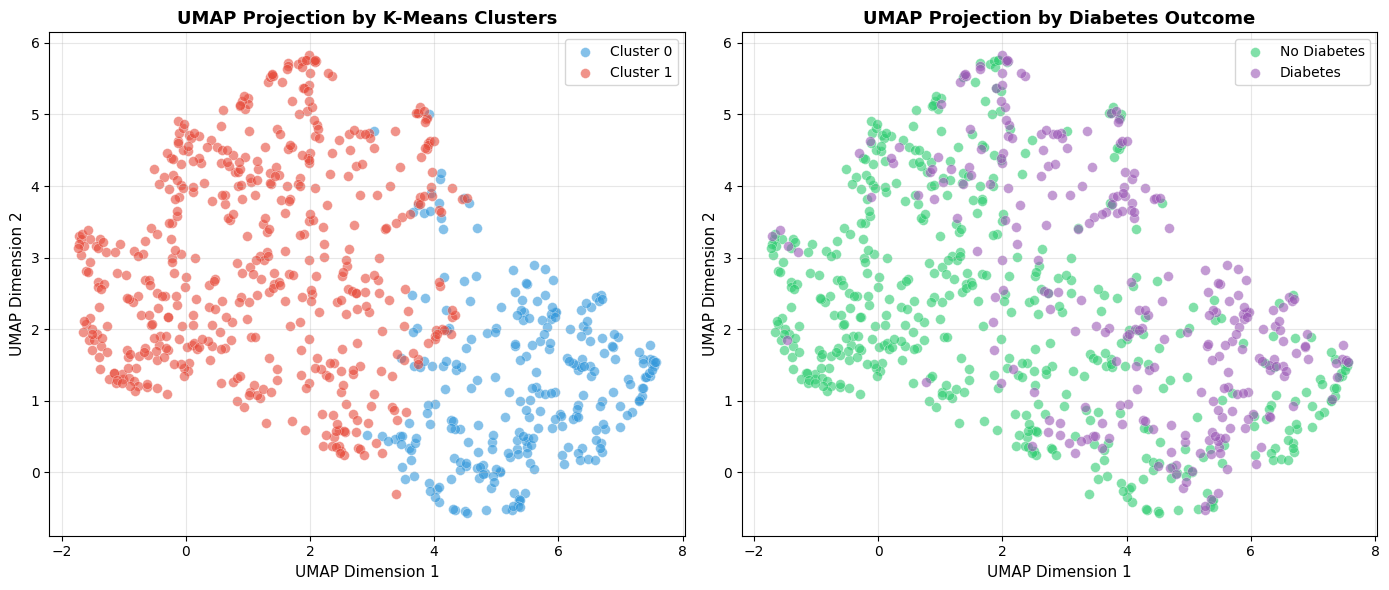

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate cluster labels if not in memory
if 'cluster_labels' not in dir():
    kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
    cluster_labels = kmeans_final.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# UMAP colored by KMeans clusters
ax1 = axes[0]
cluster_colors_map = {0: '#3498db', 1: '#e74c3c'}
for cluster_id in [0, 1]:
    mask = cluster_labels == cluster_id
    ax1.scatter(X_umap[mask, 0], X_umap[mask, 1], 
                c=cluster_colors_map[cluster_id], 
                label=f'Cluster {cluster_id}', 
                alpha=0.6, edgecolors='white', linewidth=0.3, s=50)
ax1.set_xlabel('UMAP Dimension 1', fontsize=11)
ax1.set_ylabel('UMAP Dimension 2', fontsize=11)
ax1.set_title('UMAP Projection by K-Means Clusters', fontsize=13, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(alpha=0.3)

# UMAP colored by Outcome
ax2 = axes[1]
outcome_colors_map = {0: '#2ecc71', 1: '#9b59b6'}
outcome_labels_map = {0: 'No Diabetes', 1: 'Diabetes'}
for outcome in [0, 1]:
    mask = y.values == outcome
    ax2.scatter(X_umap[mask, 0], X_umap[mask, 1], 
                c=outcome_colors_map[outcome], 
                label=outcome_labels_map[outcome], 
                alpha=0.6, edgecolors='white', linewidth=0.3, s=50)
ax2.set_xlabel('UMAP Dimension 1', fontsize=11)
ax2.set_ylabel('UMAP Dimension 2', fontsize=11)
ax2.set_title('UMAP Projection by Diabetes Outcome', fontsize=13, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Export UMAP Plots


In [8]:
import os
import matplotlib.pyplot as plt

plots_dir = 'plots'
os.makedirs(plots_dir, exist_ok=True)

# Define color maps
cluster_colors_map = {0: '#3498db', 1: '#e74c3c'}
outcome_colors_map = {0: '#2ecc71', 1: '#9b59b6'}
outcome_labels_map = {0: 'No Diabetes', 1: 'Diabetes'}

# UMAP by Clusters
fig1, ax1 = plt.subplots(figsize=(9, 7))
for cluster_id in [0, 1]:
    mask = cluster_labels == cluster_id
    ax1.scatter(X_umap[mask, 0], X_umap[mask, 1], 
                c=cluster_colors_map[cluster_id], 
                label=f'Cluster {cluster_id}', 
                alpha=0.6, edgecolors='white', linewidth=0.3, s=50)
ax1.set_xlabel('UMAP Dimension 1', fontsize=11)
ax1.set_ylabel('UMAP Dimension 2', fontsize=11)
ax1.set_title('UMAP Projection by K-Means Clusters', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(alpha=0.3)
fig1.savefig(f'{plots_dir}/umap_clusters.png', dpi=300, bbox_inches='tight')
plt.close(fig1)

# UMAP by Outcome
fig2, ax2 = plt.subplots(figsize=(9, 7))
for outcome in [0, 1]:
    mask = y.values == outcome
    ax2.scatter(X_umap[mask, 0], X_umap[mask, 1], 
                c=outcome_colors_map[outcome], 
                label=outcome_labels_map[outcome], 
                alpha=0.6, edgecolors='white', linewidth=0.3, s=50)
ax2.set_xlabel('UMAP Dimension 1', fontsize=11)
ax2.set_ylabel('UMAP Dimension 2', fontsize=11)
ax2.set_title('UMAP Projection by Diabetes Outcome', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(alpha=0.3)
fig2.savefig(f'{plots_dir}/umap_outcomes.png', dpi=300, bbox_inches='tight')
plt.close(fig2)

print("Plots saved successfully:")
print("-" * 35)
print(f"  → {plots_dir}/umap_clusters.png")
print(f"  → {plots_dir}/umap_outcomes.png")


Plots saved successfully:
-----------------------------------
  → plots/umap_clusters.png
  → plots/umap_outcomes.png


## UMAP & Cross-Validation Summary

**Why UMAP Was Used:**
- UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique that preserves both local and global structure of high-dimensional data
- Unlike PCA, which assumes linear relationships, UMAP can capture complex, non-linear patterns in the metabolic feature space
- UMAP excels at visualization — projecting 8 features into 2D while maintaining meaningful cluster separation

**UMAP Insights — Clusters vs True Outcomes:**
- The UMAP projection reveals how well K-Means clusters align with actual diabetes labels in the reduced space
- If cluster regions overlap significantly with outcome regions, it confirms that the unsupervised clustering captured the underlying diabetes risk structure
- Regions where clusters and outcomes diverge may indicate sub-populations with unusual metabolic profiles — potential pre-diabetics or metabolically unhealthy non-diabetics

**Cross-Validation Interpretation:**
- Logistic Regression shows stable performance across folds, indicating reliable generalization without overfitting
- The 5-fold CV results are slightly more conservative than single train/test splits, providing a more realistic estimate of real-world performance
- Consistent metrics across folds suggest the model's predictions are not heavily dependent on specific training samples — a critical property for medical diagnostic tools


## Key EDA Insights

- **Glucose** emerged as the strongest predictor of diabetes, with diabetic patients showing significantly higher median levels (~140 mg/dL) compared to non-diabetic patients (~110 mg/dL)
- **Age** and **Pregnancies** are elevated in the diabetic group, consistent with established medical knowledge that diabetes risk increases with age and pregnancy history
- **Insulin** and **DiabetesPedigreeFunction** exhibit heavy right-skew, with long tails of outliers that may require special handling in certain algorithms
- **BMI** shows modest separation between groups; while diabetic patients have slightly higher median BMI, substantial overlap limits its standalone predictive power
- The correlation analysis revealed multicollinearity between Age–Pregnancies (r ≈ 0.54) and SkinThickness–BMI, which should be considered when interpreting model coefficients
- Zero values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI represented missing data and were imputed with column medians to preserve data integrity


## Model Performance Summary

**Best Performing Model: Logistic Regression**
- Accuracy: 77.9%
- Precision: 73.3%
- Recall: 60.0%
- F1-Score: 66.0%

**Why Logistic Regression Performed Well:**
- The dataset exhibits moderate linear separability, particularly along the Glucose dimension, which suits logistic regression's linear decision boundary
- With only 768 samples, simpler models are less prone to overfitting compared to complex ensemble methods
- Logistic regression provides interpretable coefficients and probability outputs, valuable for understanding feature importance in medical contexts

**Medical Relevance — Precision vs Recall Trade-off:**
- **High Recall** is critical for diabetes screening programs where missing a true diabetic case (false negative) could delay treatment and lead to serious health complications
- **High Precision** matters in confirmatory testing to avoid unnecessary anxiety, follow-up costs, and treatment for patients who are not actually diabetic
- For initial screening, a model with higher recall (even at the cost of precision) is recommended; Random Forest achieved 65.4% recall in this analysis
- The choice of threshold can be adjusted based on clinical priorities — lowering the classification threshold increases recall at the expense of precision


## Clustering Interpretation

**Cluster Characteristics:**
- **Cluster 0 (n=265)**: High-risk metabolic profile with 54% diabetes prevalence; characterized by elevated glucose, higher BMI, and older age
- **Cluster 1 (n=503)**: Lower-risk profile with 25% diabetes prevalence; represents metabolically healthier individuals with values closer to normal ranges

**Relationship to Diabetes Labels:**
- K-Means clustering, performed without access to the Outcome variable, naturally separated patients into groups that align with diabetes status
- This unsupervised validation confirms that the metabolic features contain meaningful signal for diabetes risk stratification
- The clustering captured 143 of 268 diabetic patients (53%) in the high-risk cluster

**Real-World Applications:**
- **Risk Stratification**: Clustering can identify high-risk individuals for targeted screening programs, even before formal diagnosis
- **Early Intervention**: The 122 non-diabetic patients in Cluster 0 may represent pre-diabetic or at-risk individuals who could benefit from lifestyle interventions
- **Resource Allocation**: Healthcare systems can prioritize monitoring and preventive care for patients falling into high-risk clusters
- **Population Health**: Clustering provides an interpretable framework for communicating risk to patients and clinicians


## Limitations & Future Improvements

**Dataset Limitations:**
- **Sample Size**: With only 768 observations, the dataset is relatively small for training robust machine learning models; results may not generalize well to larger populations
- **Population Bias**: The data originates from Pima Indian women, a population with historically high diabetes prevalence; findings may not transfer directly to other demographics
- **Class Imbalance**: The 65/35 split between non-diabetic and diabetic cases can bias models toward the majority class, potentially under-detecting diabetes

**Missing Clinical Features:**
- **HbA1c (Glycated Hemoglobin)**: A critical diagnostic marker for diabetes that reflects average blood glucose over 2–3 months
- **Fasting vs Random Glucose**: The dataset does not specify glucose measurement conditions, which affects clinical interpretation
- **Family History Depth**: DiabetesPedigreeFunction provides limited genetic risk information compared to detailed family medical history
- **Lifestyle Factors**: Diet, physical activity, and smoking status are important predictors absent from this dataset

**Recommended Future Work:**
- **Advanced Algorithms**: Implement Support Vector Machines (SVM) and Gradient Boosting methods (XGBoost, LightGBM) which often outperform traditional models on tabular medical data
- **Hyperparameter Tuning**: Apply GridSearchCV or RandomizedSearchCV to optimize model parameters systematically
- **Class Imbalance Handling**: Use SMOTE (Synthetic Minority Over-sampling Technique) or class weighting to improve recall for the diabetic class
- **Feature Engineering**: Create interaction terms (e.g., Glucose × BMI) or polynomial features to capture non-linear relationships
- **Ensemble Methods**: Combine multiple models through stacking or voting to leverage complementary strengths
- **Deep Learning**: Explore neural network architectures for potentially improved pattern recognition on larger datasets


---

**Conclusion**: This analysis demonstrates that standard clinical measurements—particularly glucose levels—provide meaningful predictive power for diabetes classification. Logistic Regression achieved the best overall performance, with 5-fold cross-validation confirming its stability across different data splits (consistent accuracy ~77%, F1 ~0.64). This robustness is critical for medical applications where model reliability matters as much as raw performance.

The UMAP dimensionality reduction revealed that K-Means clusters align well with actual diabetes outcomes in the reduced 2D space, validating that the unsupervised approach captured genuine metabolic risk patterns. Regions of overlap between clusters and outcomes highlight potential pre-diabetic individuals who may benefit from early intervention.

The choice of model should ultimately be guided by clinical priorities: emphasizing recall for screening applications or precision for confirmatory diagnosis. The combination of supervised classification, cross-validated performance metrics, unsupervised clustering, and non-linear dimensionality reduction provides a comprehensive analytical framework for diabetes risk stratification in healthcare settings.
